In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r"C:\Users\jaswi\OneDrive\Documents\heart disease dataset\heart1.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

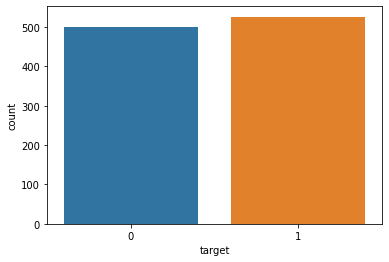

In [6]:
sns.countplot(x = 'target' , data=dataset)

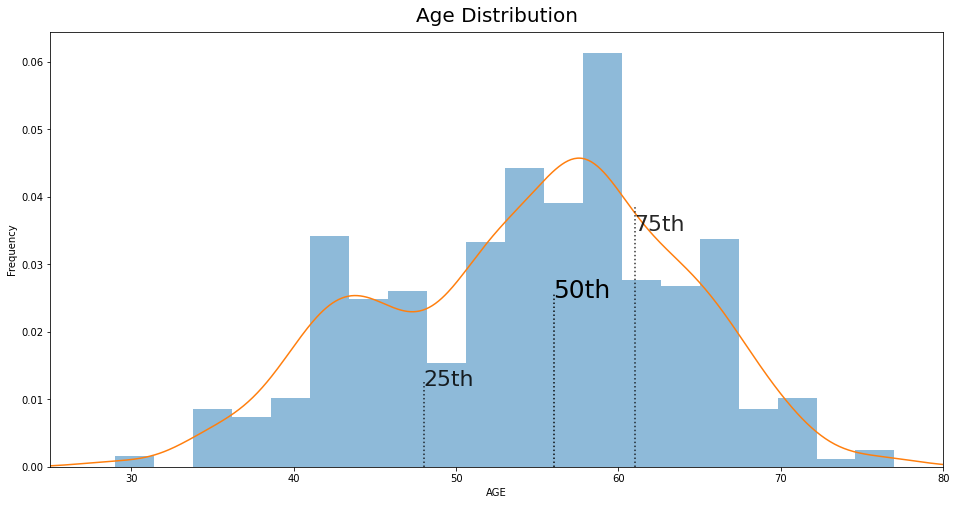

In [7]:
fig,ax = plt.subplots(figsize=(16,8))

dataset['age'].plot(kind='hist',alpha=0.5,density=True,bins=20)
dataset['age'].plot(kind='kde')

ax.set_xlabel('AGE')
ax.set_ylabel("Frequency")
ax.set_title('Age Distribution',size=20,pad=10)
ax.set_xlim(25,80)

quant25,quant50,quant75 = dataset['age'].quantile(0.25),dataset['age'].quantile(0.5),dataset['age'].quantile(0.75)
quants = [[quant25,0.8,0.2],[quant50,0.95,0.4],[quant75,0.8,0.6]]
for i in quants:
    plt.axvline(x=i[0],alpha=i[1],ymax=i[2],linestyle=':',color='black')
    
ax.text(quant25, 0.012, "25th", size = 22, alpha = 0.85)
ax.text(quant50, 0.025, "50th", size = 25, alpha = 1)
ax.text(quant75, 0.035, "75th", size = 22, alpha = 0.85)
ax.grid(False)
plt.show()

<AxesSubplot:>

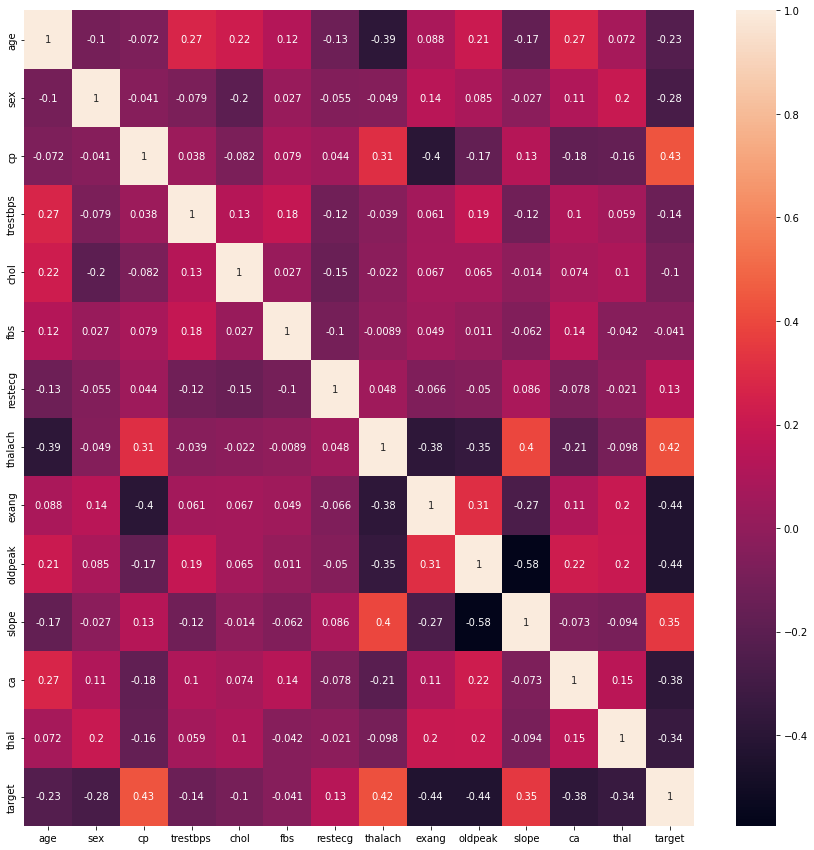

In [8]:
corr_mat = dataset.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat , annot=True)

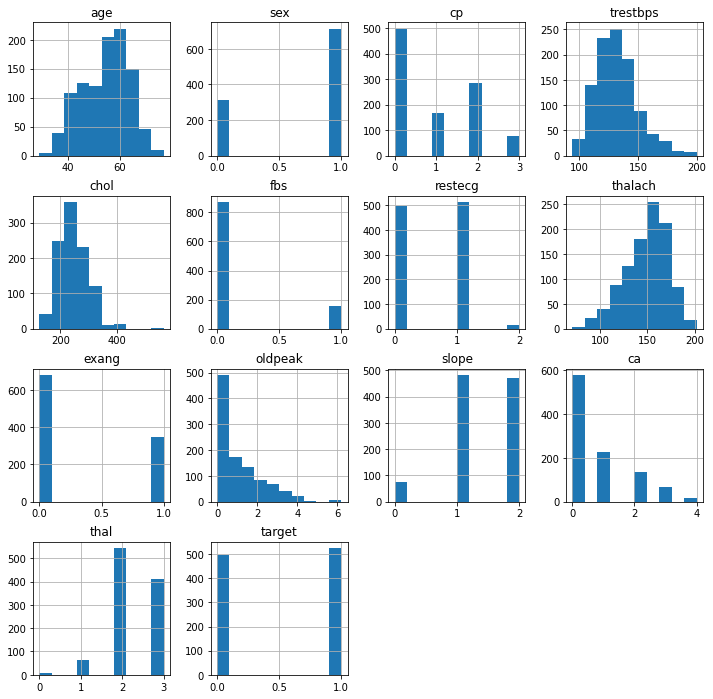

In [9]:
dataset.hist(figsize=(12,12))
plt.show()

In [10]:
dataset2 = pd.get_dummies(dataset , columns=['sex' , 'cp' , 'fbs' , 'restecg' , 'exang' , 'slope' , 'ca' , 'thal'])


In [11]:
dataset2.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,70,145,174,125,2.6,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [12]:
cols = ['cp_0','cp_1','cp_2','cp_3', 'trestbps', 'chol', 'fbs_0','fbs_1', 'restecg_0','restecg_1','restecg_2', 'thalach', 'exang_0','exang_1']    

In [13]:
x = dataset2[cols]
y = dataset2.target

In [14]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.0307154 , -0.44117876, -0.61908469, ...,  0.82132052,
         0.71228712, -0.71228712],
       [ 1.0307154 , -0.44117876, -0.61908469, ...,  0.2559679 ,
        -1.40392824,  1.40392824],
       [ 1.0307154 , -0.44117876, -0.61908469, ..., -1.04869198,
        -1.40392824,  1.40392824],
       ...,
       [ 1.0307154 , -0.44117876, -0.61908469, ..., -1.35311262,
        -1.40392824,  1.40392824],
       [ 1.0307154 , -0.44117876, -0.61908469, ...,  0.42992256,
         0.71228712, -0.71228712],
       [ 1.0307154 , -0.44117876, -0.61908469, ..., -1.57055593,
         0.71228712, -0.71228712]])

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state = 42)
x_train.shape

(820, 14)

In [17]:
x_test.shape

(205, 14)

In [18]:
x_train

array([[-0.97019992, -0.44117876,  1.61528788, ..., -1.00520332,
         0.71228712, -0.71228712],
       [ 1.0307154 , -0.44117876, -0.61908469, ...,  0.21247924,
        -1.40392824,  1.40392824],
       [-0.97019992, -0.44117876,  1.61528788, ...,  0.77783186,
         0.71228712, -0.71228712],
       ...,
       [ 1.0307154 , -0.44117876, -0.61908469, ...,  1.03876384,
        -1.40392824,  1.40392824],
       [ 1.0307154 , -0.44117876, -0.61908469, ...,  0.51689988,
         0.71228712, -0.71228712],
       [ 1.0307154 , -0.44117876, -0.61908469, ...,  0.47341122,
         0.71228712, -0.71228712]])

In [19]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=25)

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7707317073170732

In [22]:
x_test

array([[ 1.0307154 , -0.44117876, -0.61908469, ...,  0.60387721,
         0.71228712, -0.71228712],
       [-0.97019992, -0.44117876,  1.61528788, ..., -1.48357861,
         0.71228712, -0.71228712],
       [ 1.0307154 , -0.44117876, -0.61908469, ..., -0.17891872,
        -1.40392824,  1.40392824],
       ...,
       [-0.97019992, -0.44117876,  1.61528788, ...,  0.86480918,
         0.71228712, -0.71228712],
       [ 1.0307154 , -0.44117876, -0.61908469, ..., -0.48333936,
        -1.40392824,  1.40392824],
       [-0.97019992, -0.44117876,  1.61528788, ...,  0.69085453,
         0.71228712, -0.71228712]])

In [23]:
y_pred


array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1], dtype=int64)

<AxesSubplot:>

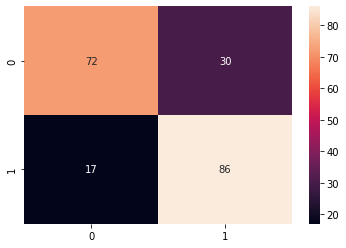

In [24]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [25]:
from sklearn.metrics import classification_report
matrix=classification_report(y_test,y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       102
           1       0.74      0.83      0.79       103

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.77      0.77       205



In [26]:
import pickle
pickle.dump(classifier , open('model.pkl' , 'wb'))
pickle.dump(scaler , open('sc.pkl','wb'))